In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

C:\Users\amirr\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X_num, y_num = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [3]:
X = torch.from_numpy(X_num.astype(np.float32))
y = torch.from_numpy(y_num.astype(np.float32))
y = y.view(y.shape[0], 1)
n_samples, n_feature = X.shape

In [4]:
input_size, output_size = n_feature, 1
model = nn.Linear(input_size, output_size)

In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [7]:
for i in range(100):
    yp = model(X)
    loss = criterion(yp, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

In [8]:
[w, b] = model.parameters()
w, b

(Parameter containing:
 tensor([[65.7191]], requires_grad=True),
 Parameter containing:
 tensor([5.0997], requires_grad=True))

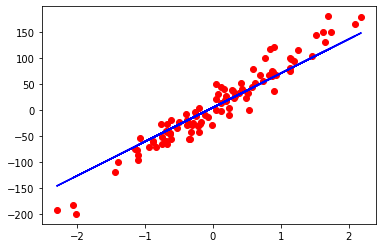

In [9]:
yp = model(X).detach().numpy()
plt.plot(X_num, y_num, 'ro')
plt.plot(X_num, yp, 'b')